# Random Forest

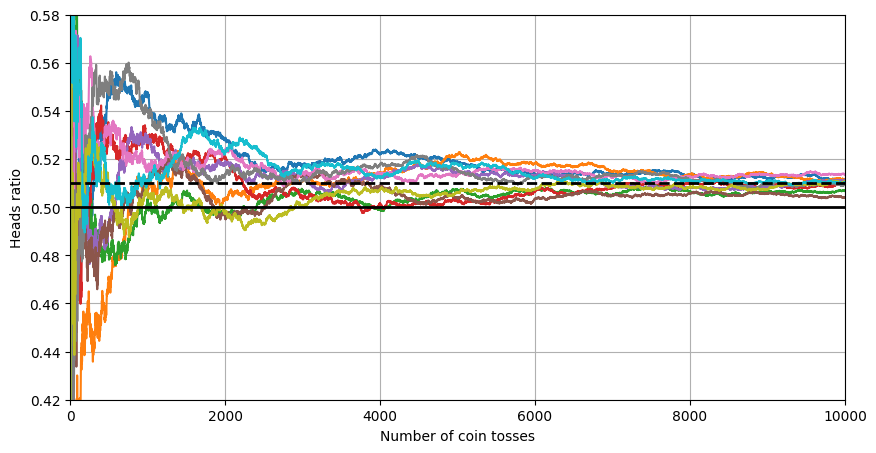

In [1]:
import numpy as np
import matplotlib.pyplot as plt

head_probs = 0.51
np.random.seed(42)

coin_tosses = (np.random.rand(10000, 10) < head_probs).astype(np.int32)
cumulative_heads = coin_tosses.cumsum(axis=0)
cumulative_heads_ratio = cumulative_heads / np.arange(1, 10001).reshape(-1, 1)

plt.figure(figsize=(10, 5))
plt.plot(cumulative_heads_ratio)
plt.plot([0, 10000], [0.51, 0.51], 'k--', linewidth=2, label='51%')
plt.plot([0, 10000], [0.5, 0.5], 'k-', linewidth=2, label='50%')
plt.xlabel('Number of coin tosses')
plt.ylabel("Heads ratio")
plt.grid()
plt.axis([0, 10000, 0.42, 0.58])
plt.show()

In [2]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

X, y = make_moons(n_samples=500, noise=0.3, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

voting_clf = VotingClassifier(
    estimators=[
        ("lr", LogisticRegression(random_state=42)),
        ("rf", RandomForestClassifier(random_state=42)),
        ("svc", SVC(random_state=42, probability=True)),
        ("dt", DecisionTreeClassifier(max_depth=2)),
    ],
    voting="soft",
)

voting_clf.fit(X_train, y_train)

,estimators,"[('lr', ...), ('rf', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True


In [3]:
for name, clf in voting_clf.named_estimators_.items():
    print(f'{name} = {clf.score(X_test, y_test)}')

lr = 0.864
rf = 0.896
svc = 0.896
dt = 0.896


In [4]:
voting_clf.predict(X_test[:1])

array([1])

In [5]:
[clf.predict(X_test[:1]) for clf in voting_clf.estimators_]

[array([1]), array([1]), array([0]), array([1])]

In [6]:
voting_clf.score(X_test, y_test)

0.92

## Bagging and Pasting 

In [7]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=100,
    n_jobs=11,
    random_state=42,
)

bag_clf.fit(X_train, y_train)

,estimator,DecisionTreeClassifier()
,n_estimators,500
,max_samples,100
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,11
,random_state,42
,verbose,0


### OOB Evaluation

In [8]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), 
    n_estimators=500,
    max_samples=100,
    n_jobs=-1,
    random_state=42,
    oob_score=True
)

bag_clf.fit(X_train, y_train)

,estimator,DecisionTreeClassifier()
,n_estimators,500
,max_samples,100
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,True
,warm_start,False
,n_jobs,-1
,random_state,42
,verbose,0


In [9]:
bag_clf.oob_score_

0.9253333333333333

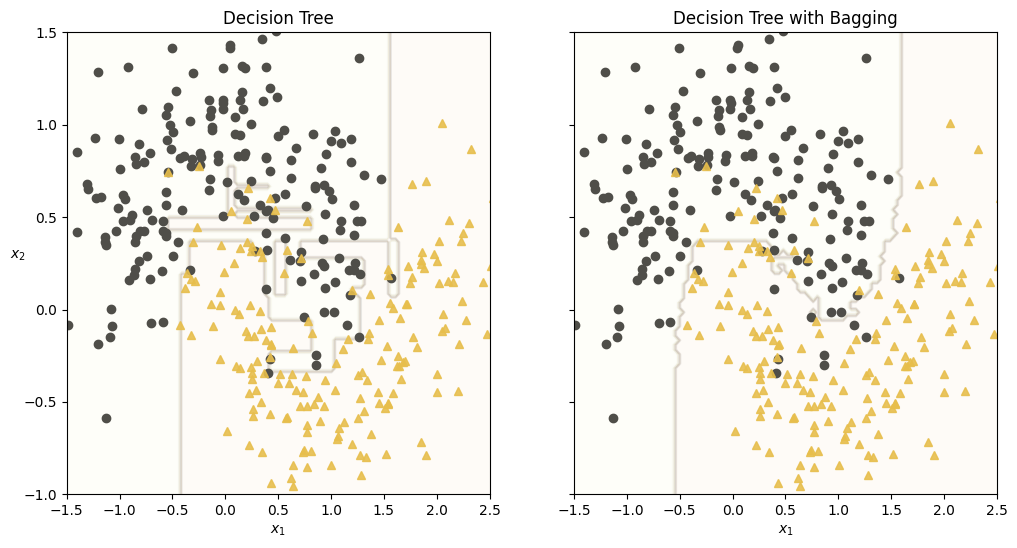

In [10]:
def plot_decision_boundary(clf, X, y, alpha=0.1):
    axes = [-1.5, 2.5, -1.0, 1.5]
    x1, x2 = np.meshgrid(
        np.linspace(axes[0], axes[1], 100), np.linspace(axes[2], axes[3], 100)
    )

    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    plt.contourf(x1, x2, y_pred, alpha=0.3 * alpha, cmap="Wistia")
    plt.contour(x1, x2, y_pred, alpha=0.8 * alpha, cmap="Greys")
    colors = ["#4f4e49", "#e7be4ce4"]
    markers = ("o", "^")

    for idx in (0, 1):
        plt.plot(
            X[:, 0][y == idx],
            X[:, 1][y == idx],
            color=colors[idx],
            marker=markers[idx],
            linestyle="none",
        )

    plt.axis(axes)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)


tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

fig, ax = plt.subplots(ncols=2, figsize=(12, 6), sharey=True)
plt.sca(ax[0])
plot_decision_boundary(tree_clf, X_train, y_train)
plt.title("Decision Tree")
plt.sca(ax[1])
plot_decision_boundary(bag_clf, X_train, y_train)
plt.title("Decision Tree with Bagging")
plt.ylabel("")

plt.show()

In [11]:
from sklearn.metrics import accuracy_score

y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.904

# Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(
    n_estimators=500,
    max_samples=100,
    n_jobs=-1, 
    random_state=42
)

In [13]:
rnd_clf.fit(X_train, y_train)
rnd_pred_rf = rnd_clf.predict(X_test) 

In [14]:
rnd_pred_rf

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [15]:
accuracy_score(y_test,rnd_pred_rf)

0.92

In [16]:
from sklearn.ensemble import ExtraTreesClassifier

extra_clf = ExtraTreesClassifier(
    n_estimators=500,
    n_jobs=-1, 
    random_state=42
)

extra_clf.fit(X_train, y_train)
extra_clf_pred = extra_clf.predict(X_test)

In [17]:
accuracy_score(y_test, extra_clf_pred)

0.888

### Feature Importance

In [18]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)

rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris.data, iris.target)

for score, name in zip(rnd_clf.feature_importances_, iris.data.columns):
    print(round(score, 2), name)

0.11 sepal length (cm)
0.02 sepal width (cm)
0.44 petal length (cm)
0.42 petal width (cm)


In [19]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=30,
    learning_rate=0.5, 
    random_state=42
)

ada_clf.fit(X_train, y_train)

,estimator,DecisionTreeC...r(max_depth=1)
,n_estimators,30
,learning_rate,0.5
,algorithm,'deprecated'
,random_state,42
,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


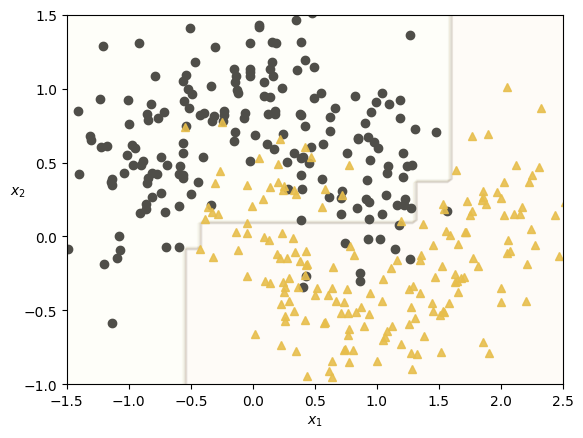

In [21]:
plot_decision_boundary(ada_clf, X_train, y_train)

In [84]:
from sklearn.ensemble import GradientBoostingRegressor

grad_clf = GradientBoostingRegressor(
    max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42
)

In [85]:
grad_clf.fit(X, y)

,loss,'squared_error'
,learning_rate,1.0
,n_estimators,3
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,2
,min_impurity_decrease,0.0
,init,None


## regressor

In [86]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:, 0] ** 2 + 0.05 * np.random.randn(100)

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

,criterion,'squared_error'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [87]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=43)
tree_reg2.fit(X, y2)

,criterion,'squared_error'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,43
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [88]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=44)
tree_reg3.fit(X, y3)

,criterion,'squared_error'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,44
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [89]:
X_new = np.array([[-0.4], [0.], [0.5]])
sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

array([0.49484029, 0.04021166, 0.75026781])

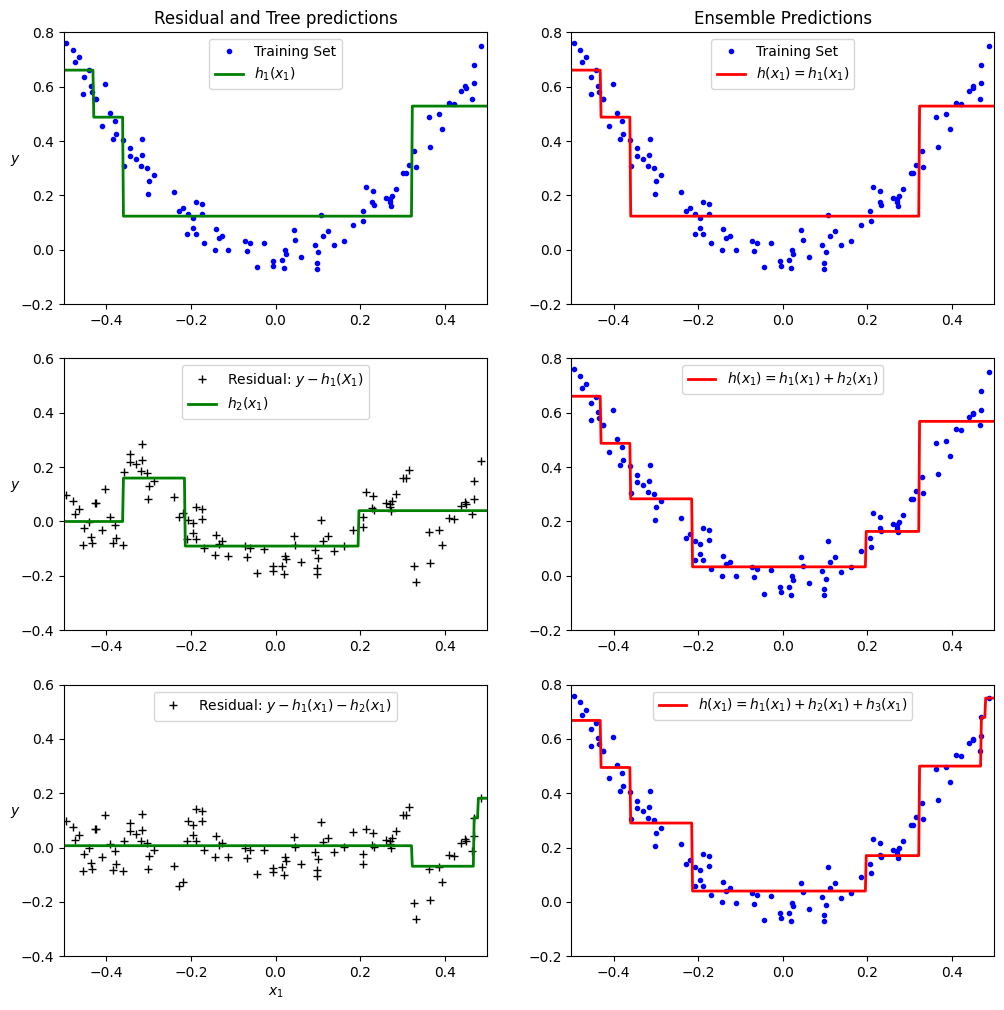

In [90]:
def plot_prediction(
    regressors, X, y, axes, style, label=None, data_style="b.", data_label=None
):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center")
    plt.axis(axes)


plt.figure(figsize=(12, 12))

plt.subplot(3, 2, 1)
plot_prediction(
    [tree_reg1],
    X,
    y,
    axes=[-0.5, 0.5, -0.2, 0.8],
    style="g-",
    label="$h_1(x_1)$",
    data_label="Training Set",
)
plt.ylabel("$y$", rotation=0)
plt.title("Residual and Tree predictions")

plt.subplot(3, 2, 2)
plot_prediction(
    [tree_reg1],
    X,
    y,
    axes=[-0.5, 0.5, -0.2, 0.8],
    style="r-",
    label="$h(x_1) = h_1(x_1)$",
    data_label="Training Set",
)
plt.title("Ensemble Predictions")


plt.subplot(3, 2, 3)
plot_prediction(
    [tree_reg2],
    X,
    y2,
    axes=[-0.5, 0.5, -0.4, 0.6],
    style="g-",
    label="$h_2(x_1)$",
    data_style="k+",
    data_label="Residual: $y - h_1(X_1)$",
)
plt.ylabel("$y$", rotation=0)

plt.subplot(3, 2, 4)
plot_prediction(
    [tree_reg1, tree_reg2],
    X,
    y,
    style="r-",
    axes=[-0.5, 0.5, -0.2, 0.8],
    label="$h(x_1) = h_1(x_1) + h_2(x_1)$",
)

plt.subplot(3, 2, 5)
plot_prediction(
    [tree_reg3],
    X,
    y3,
    axes=[-0.5, 0.5, -0.4, 0.6],
    style="g-",
    data_style="k+",
    data_label="Residual: $y - h_1(x_1) - h_2(x_1)$",
)
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)

plt.subplot(3, 2, 6)
plot_prediction(
    [tree_reg1, tree_reg2, tree_reg3],
    X,
    y,
     style="r-",
    axes=[-0.5, 0.5, -0.2, 0.8],
    label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$",
)

In [93]:
grad_best = GradientBoostingRegressor(
    max_depth=2,
    learning_rate=0.05,
    n_estimators=500,
    n_iter_no_change=10,
    random_state=42,
)

In [94]:
grad_best.fit(X, y)

,loss,'squared_error'
,learning_rate,0.05
,n_estimators,500
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,2
,min_impurity_decrease,0.0
,init,None


In [95]:
grad_best.n_estimators_

92

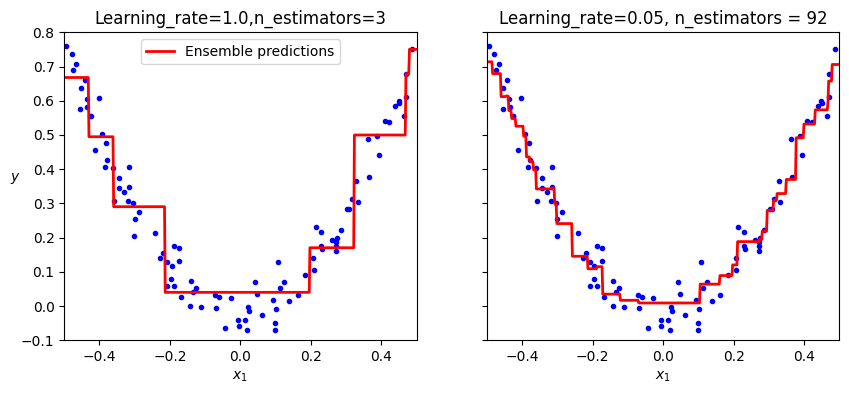

In [96]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plot_prediction(
    [grad_clf],
    X,
    y,
    axes=[-0.5, 0.5, -0.1, 0.8],
    style="r-",
    label="Ensemble predictions",
)
plt.title(
    f"Learning_rate={grad_clf.learning_rate}," f"n_estimators={grad_clf.n_estimators_}"
)

plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)

plt.sca(axes[1])
plot_prediction([grad_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8], style="r-")
plt.title(
    f"Learning_rate={grad_best.learning_rate}, "
    f"n_estimators = {grad_best.n_estimators_}"
)
plt.xlabel("$x_1$")

plt.show()

In [98]:

import pandas as pd
from sklearn.model_selection import train_test_split
import tarfile
import urllib.request
from pathlib import Path

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
housing_labels = train_set["median_house_value"]
housing = train_set.drop("median_house_value", axis=1)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.